<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [10]:
from datetime import datetime, timezone
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url )
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [11]:
def get_summary(df):
  # add code below which prints the first 5 rows of the dataset, the info and the numerical summary
  return df.head(), df.info(), df.describe()


get_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


(         date  value
 0  2016-05-09   1201
 1  2016-05-10   2329
 2  2016-05-11   1716
 3  2016-05-12  10539
 4  2016-05-13   6933, None,               value
 count  1.304000e+03
 mean   6.722068e+04
 std    5.933964e+04
 min    1.201000e+03
 25%    3.575775e+04
 50%    5.719750e+04
 75%    8.388300e+04
 max    1.173655e+06)

### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [12]:
### CONVERT THE DATA COLUMN TO DATETIME TYPE 
# step 1: to check the data type
df.dtypes

date     object
value     int64
dtype: object

In [13]:
# step 2: to convert date column (string ) into a pandas sepcial datetime format 
df["datetime"] = pd.to_datetime(df.date)
df.head()

,date,value,datetime
0,2016-05-09,1201,2016-05-09
1,2016-05-10,2329,2016-05-10
2,2016-05-11,1716,2016-05-11
3,2016-05-12,10539,2016-05-12
4,2016-05-13,6933,2016-05-13


In [14]:
# step 3: to confirm the result: 
df.dtypes

date                object
value                int64
datetime    datetime64[ns]
dtype: object

Reference : https://www.youtube.com/watch?v=yCgJGsg0Xa4

API Reference Pandas- https://pandas.pydata.org/docs/reference/index.html

In [15]:
### create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.strftime("%B")
df["day"] = df["datetime"].dt.day
df

,date,value,datetime,year,month,day
0,2016-05-09,1201,2016-05-09,2016,May,9
1,2016-05-10,2329,2016-05-10,2016,May,10
2,2016-05-11,1716,2016-05-11,2016,May,11
3,2016-05-12,10539,2016-05-12,2016,May,12
4,2016-05-13,6933,2016-05-13,2016,May,13
...,...,...,...,...,...,...
1299,2019-11-29,171584,2019-11-29,2019,November,29
1300,2019-11-30,141161,2019-11-30,2019,November,30
1301,2019-12-01,142918,2019-12-01,2019,December,1
1302,2019-12-02,220144,2019-12-02,2019,December,2


In [16]:
#set the index to the date column
df.set_index('datetime', inplace=True)


Reference - https://www.youtube.com/watch?v=jeniUhz0mKE

In [17]:
### clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
# Step 1: use sort_values() methods to sort the date fron the lowest to the highest
value_sorted = df.sort_values(["value"])
#value_sorted[-50:] # to check the last 50 rows
#value_sorted[0:50] # to check the frist 50 rows
value_sorted

,date,value,year,month,day
datetime,,,,,
2016-05-09,2016-05-09,1201,2016,May,9
2016-05-11,2016-05-11,1716,2016,May,11
2016-05-10,2016-05-10,2329,2016,May,10
2016-05-16,2016-05-16,2591,2016,May,16
2016-05-15,2016-05-15,2927,2016,May,15
...,...,...,...,...,...
2019-11-15,2019-11-15,314101,2019,November,15
2019-08-06,2019-08-06,337325,2019,August,6
2019-08-07,2019-08-07,341595,2019,August,7


In [18]:
# Step 2:  to remove the lowest 2.5% (0.025) and the highest 2.5% (0.975)
lower_limit = df["value"].quantile(0.025)
upper_limit = df["value"].quantile(0.975)
#print(lower_limit, upper_limit)

#filter all the non outlier values to give a normalised df.
filtered_value = df[df["value"]>=lower_limit]
filtered_value = filtered_value[(filtered_value["value"]<=upper_limit)]
#filtered_value_sorted = filtered_value.sort_values(["value"])
filtered_value

,date,value,year,month,day
datetime,,,,,
2016-05-19,2016-05-19,19736,2016,May,19
2016-05-26,2016-05-26,18060,2016,May,26
2016-05-27,2016-05-27,19997,2016,May,27
2016-05-28,2016-05-28,19044,2016,May,28
2016-05-29,2016-05-29,20325,2016,May,29
...,...,...,...,...,...
2019-11-24,2019-11-24,138875,2019,November,24
2019-11-29,2019-11-29,171584,2019,November,29
2019-11-30,2019-11-30,141161,2019,November,30


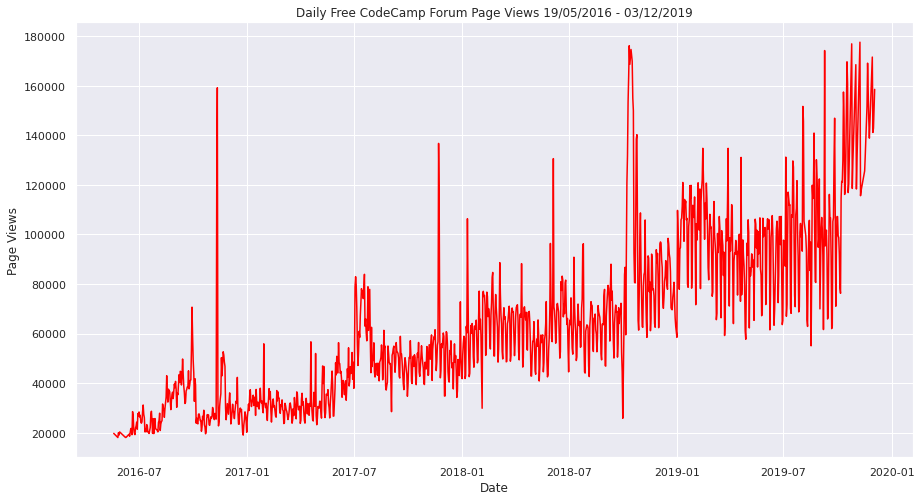

In [30]:
### POT A LINE CHART
filtered_data = filtered_value["value"]
chart = sns.lineplot(data=filtered_data, color='red')
sns.set_style("whitegrid")
plt.title("Daily Free CodeCamp Forum Page Views 19/05/2016 - 03/12/2019")
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlabel("Date");
plt.ylabel("Page Views");

Reference for change the wides of the line chart- https://stackabuse.com/change-figure-size-in-matplotlib/
How to add linechart tittle in pandas 
https://www.python-graph-gallery.com/4-add-title-and-axis-label


###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


In [20]:
###### Reference for this code - https://soulsinporto.medium.com/custom-sort-a-pandas-dataframe-with-pd-categorical-c4eec8343957

###### to sort the above "month" column in Categorical order

months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
filtered_value["month"] = pd.Categorical(filtered_value["month"], categories = months_categories)
sorted_filtered_value = filtered_value.sort_values(by = "month")
sorted_filtered_value

,date,value,year,month,day
datetime,,,,,
2017-01-06,2017-01-06,37353,2017,January,6
2019-01-06,2019-01-06,94108,2019,January,6
2019-01-05,2019-01-05,77897,2019,January,5
2019-01-04,2019-01-04,94514,2019,January,4
2019-01-03,2019-01-03,100710,2019,January,3
...,...,...,...,...,...
2017-12-29,2017-12-29,72819,2017,December,29
2017-12-28,2017-12-28,51018,2017,December,28
2017-12-27,2017-12-27,43075,2017,December,27


In [21]:
#### 4. Wrangle-the-data in Exercise 8 - pivot table of state and population

pivot_table = pd.pivot_table(sorted_filtered_value, values = "value", index = "year", columns = "month", aggfunc = np.mean )
pivot_table

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


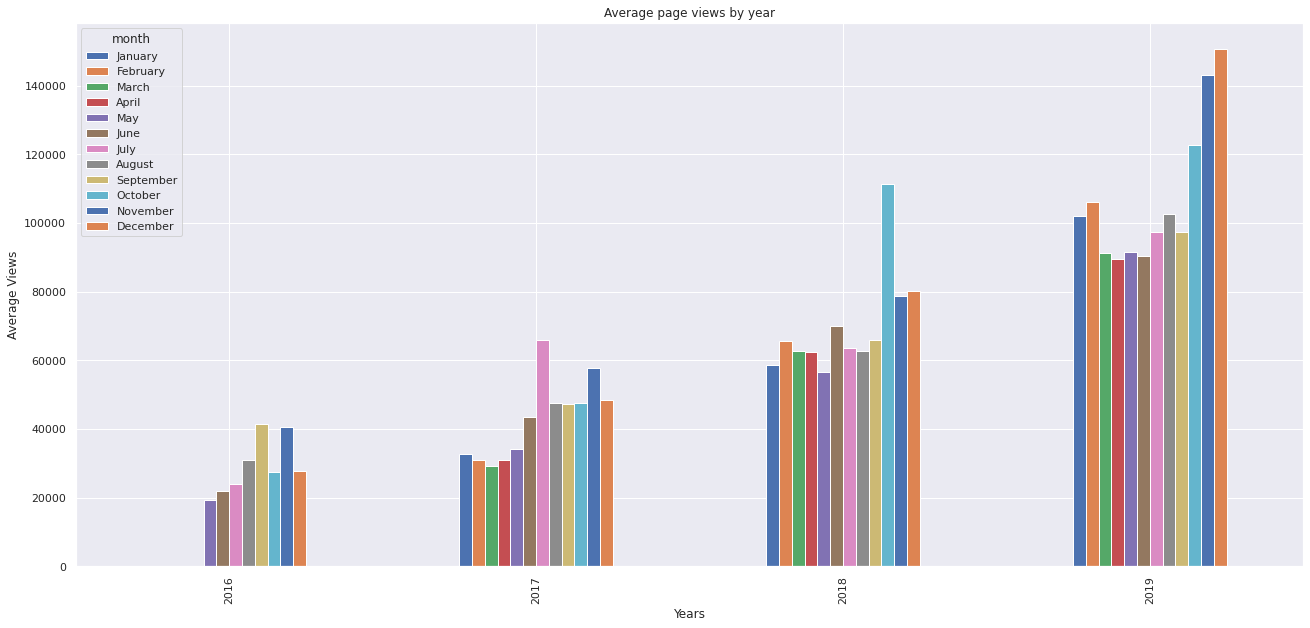

In [28]:
from datetime import datetime, timezone
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(22,10)})
pivot_table.plot(kind='bar', xlabel = 'Years', ylabel = 'Average Views', title = 'Average page views by year')
#legend(bbox_to_anchor=(1.2, 1)
pivot_table.plot; 
#(add "; " to remove the top message from the chart)


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


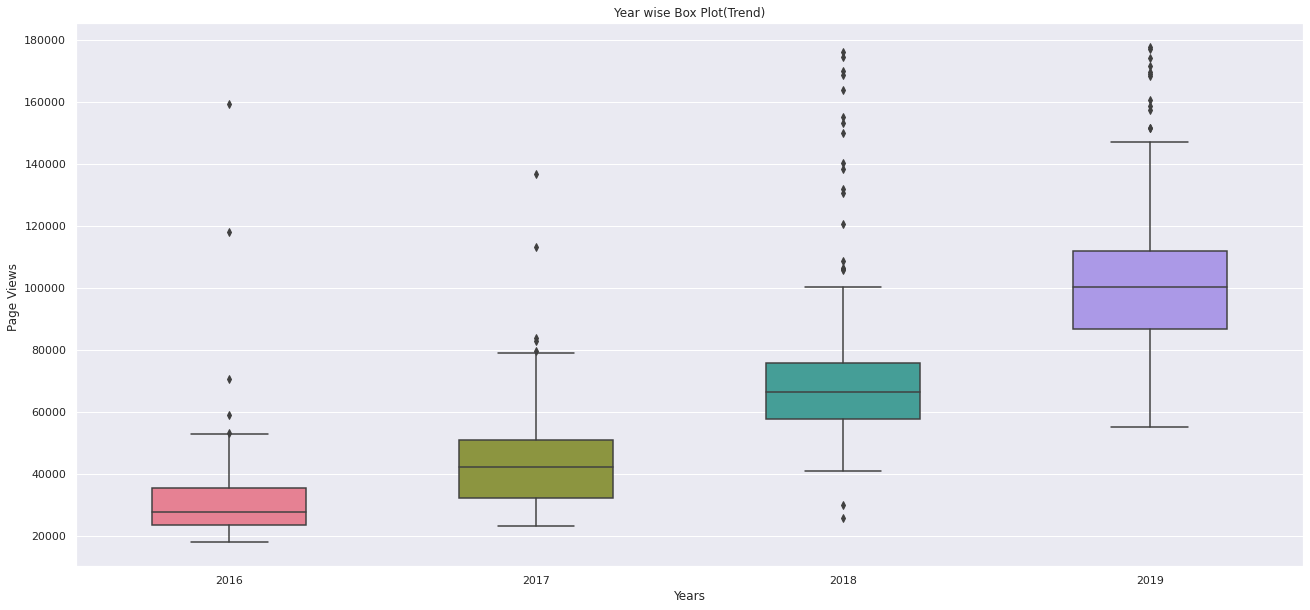

In [23]:
# Box Plot 1: Year wise Box Plot  
bplot = sns.boxplot(y="value", x= "year", data = sorted_filtered_value, width = 0.5, palette ="husl")
plt.xlabel ("Years", size=12)
plt.ylabel("Page Views ", size=12)
plt.title("Year wise Box Plot(Trend)")
bplot;

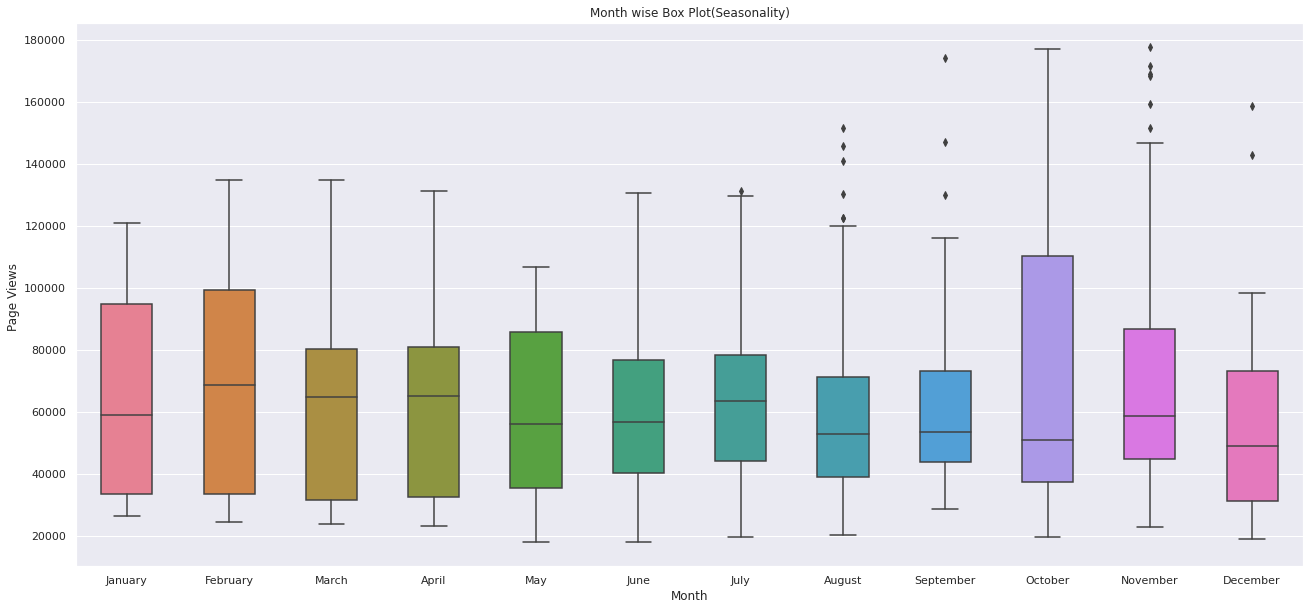

In [24]:
## Box Plot 2: Month wise Box Plot  
bplot = sns.boxplot(y="value", x= "month", data = sorted_filtered_value, width = 0.5, palette ="husl")
plt.xlabel ("Month", size=12)
plt.ylabel("Page Views ", size=12)
plt.title("Month wise Box Plot(Seasonality)")
bplot;

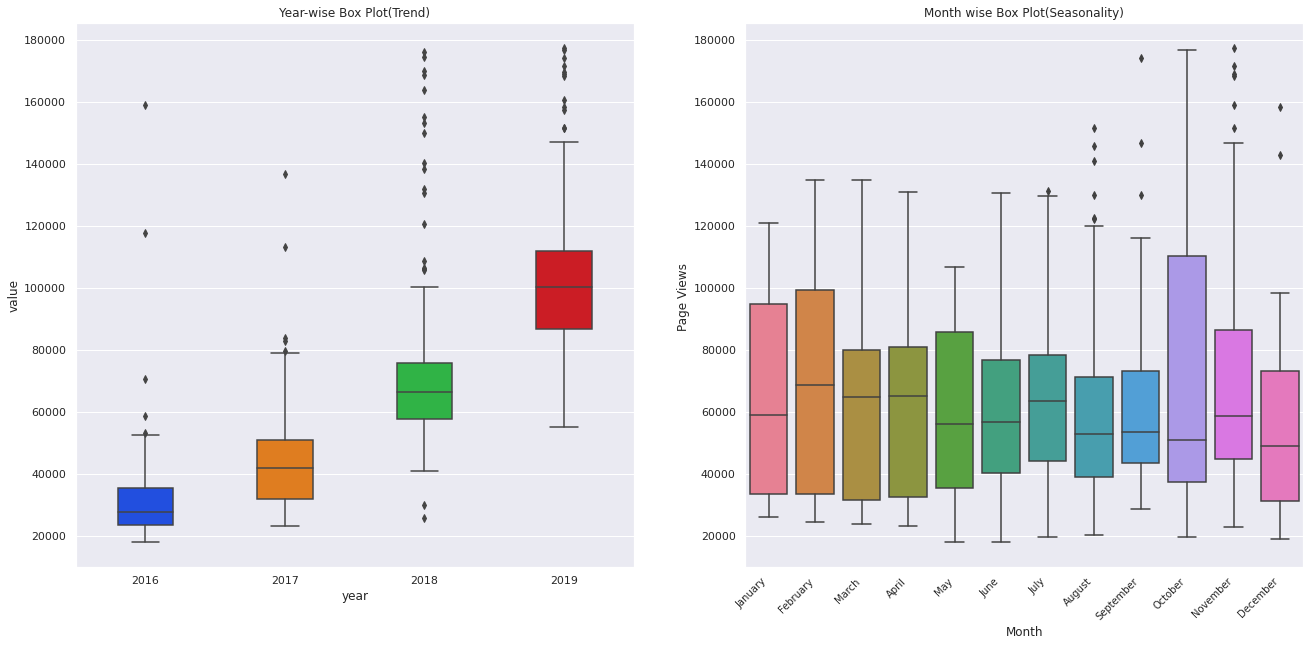

In [25]:
### Box Plot 2: Month wise Box Plot  
fig, axes = plt.subplots(1,2)
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(x= "year", y="value", data = sorted_filtered_value, width = 0.4, palette ="bright", ax=axes[0]).set(title = "Year-wise Box Plot(Trend)")
plt.xlabel ("Years", size=12)
plt.ylabel("Page Views ", size=12)
sns.boxplot(x= "month", y="value", data =sorted_filtered_value, width = 0.8, palette ="husl", ax=axes[1]).set(title ="Month wise Box Plot(Seasonality)");
plt.xlabel ("Month", size=12)
plt.ylabel("Page Views ", size=12)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small');  


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


LinregressResult(slope=24385.517311982203, intercept=-49137675.655596785, rvalue=0.79327142764719, pvalue=1.339593313017064e-268, stderr=532.3830168399696)
Regression slope =  24385.517311982203
Regression intercept = -49137675.655596785
R value =  0.79327142764719


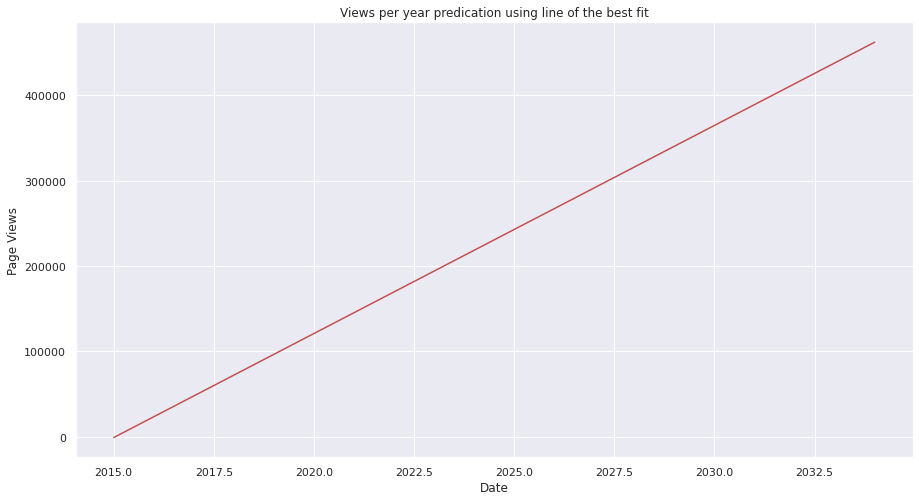

In [43]:
import pandas as pd
from scipy.stats import linregress

def get_lineregress(df):
  x = df["year"]
  y = df["value"]
  regression = linregress(x,y)

  print(regression)
  print("Regression slope = ", regression.slope)
  print("Regression intercept =", regression.intercept)
  print("R value = ", regression[2])

  #plt.plot(x, y, 'o', label='data points')
  guess = np.arange(2015,2035)
  #print(guess)
  plt.plot(guess, regression.intercept + regression.slope*guess, 'r', label='fitted line')

  plt.title("Views per year predication using line of the best fit")
  sns.set(rc = {'figure.figsize':(15,8)})
  plt.xlabel("Date");
  plt.ylabel("Page Views");
  return regression 


regression = get_lineregress(sorted_filtered_value);

In [48]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2020, regression.slope, regression.intercept)
print(prediction)

121069.31460726261


In [49]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2025, regression.slope, regression.intercept)
print(prediction)

242996.90116717666


In [50]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2030, regression.slope, regression.intercept)
print(prediction)

364924.48772708327


From above the "Views per year predication using line of the best fit" line as we can found that the page review for the year 2020, 2025 and 2030 are 121069, 242996 and 364924. 

# Reflect

What caused the biggest problems?
How did you solve these problems?